## Preprocessing

In [65]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head(5)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [66]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df_copy = application_df.copy()

In [67]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [68]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [69]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [70]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [71]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [72]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 500
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [73]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_application_df = pd.get_dummies(application_df)
dummy_application_df.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [74]:
# Split our preprocessed data into our features and target arrays
X = dummy_application_df.drop('IS_SUCCESSFUL', axis=1)
y = dummy_application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [75]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3600      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100, verbose=2, batch_size=16)

Epoch 1/100
1608/1608 - 10s - loss: 0.5673 - accuracy: 0.7230 - 10s/epoch - 6ms/step
Epoch 2/100
1608/1608 - 4s - loss: 0.5552 - accuracy: 0.7275 - 4s/epoch - 2ms/step
Epoch 3/100
1608/1608 - 4s - loss: 0.5518 - accuracy: 0.7303 - 4s/epoch - 2ms/step
Epoch 4/100
1608/1608 - 6s - loss: 0.5505 - accuracy: 0.7315 - 6s/epoch - 4ms/step
Epoch 5/100
1608/1608 - 3s - loss: 0.5495 - accuracy: 0.7323 - 3s/epoch - 2ms/step
Epoch 6/100
1608/1608 - 2s - loss: 0.5475 - accuracy: 0.7330 - 2s/epoch - 1ms/step
Epoch 7/100
1608/1608 - 3s - loss: 0.5469 - accuracy: 0.7325 - 3s/epoch - 2ms/step
Epoch 8/100
1608/1608 - 3s - loss: 0.5461 - accuracy: 0.7329 - 3s/epoch - 2ms/step
Epoch 9/100
1608/1608 - 2s - loss: 0.5459 - accuracy: 0.7342 - 2s/epoch - 1ms/step
Epoch 10/100
1608/1608 - 2s - loss: 0.5450 - accuracy: 0.7346 - 2s/epoch - 1ms/step
Epoch 11/100
1608/1608 - 2s - loss: 0.5444 - accuracy: 0.7352 - 2s/epoch - 1ms/step
Epoch 12/100
1608/1608 - 3s - loss: 0.5442 - accuracy: 0.7352 - 3s/epoch - 2ms/step

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1, batch_size=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 [==============================] - 13s 1ms/step - loss: 0.5636 - accuracy: 0.7289
Loss: 0.5635594129562378, Accuracy: 0.728863000869751


In [16]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')

## Optimization Method 1 - Add/Drop Columns

In [76]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Make a copy of the working dataset
application_df_op1 = application_df_copy.copy()

print("Step 1 of 6 - Start... Samples: ", len(application_df_op1), " | (No dummies) Columns/Features: ", len(application_df_op1.columns))

Step 1 of 6 - Start... Samples:  34299  | (No dummies) Columns/Features:  10


In [77]:
cutoff_value = 10
application_types_to_replace = application_df_op1['APPLICATION_TYPE'].value_counts()[application_df_op1['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

for app in application_types_to_replace:
    application_df_op1['APPLICATION_TYPE'] = application_df_op1['APPLICATION_TYPE'].replace(app,"Other")

cutoff_value2 = 10
classifications_to_replace = application_df_op1['CLASSIFICATION'].value_counts()[application_df_op1['CLASSIFICATION'].value_counts() < cutoff_value2].index.tolist()

for cls in classifications_to_replace:
    application_df_op1['CLASSIFICATION'] = application_df_op1['CLASSIFICATION'].replace(cls,"Other")

print("Step 2 of 6 - Simplify 'APPLICATION_TYPE' & 'CLASSIFICATION'... Samples: ", len(application_df_op1), " | (No dummies) Columns/Features: ", len(application_df_op1.columns))

Step 2 of 6 - Simplify 'APPLICATION_TYPE' & 'CLASSIFICATION'... Samples:  34299  | (No dummies) Columns/Features:  10


In [78]:
dummy_working_op1_df = pd.get_dummies(application_df_op1)
dummy_working_op1_df.head(3)

print("Step 3 of 6 - Get Dummies... Samples: ", len(dummy_working_op1_df), " | Columns/Features: ", len(dummy_working_op1_df.columns))
dummy_working_op1_df.head(3)

Step 3 of 6 - Get Dummies... Samples:  34299  | Columns/Features:  72


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


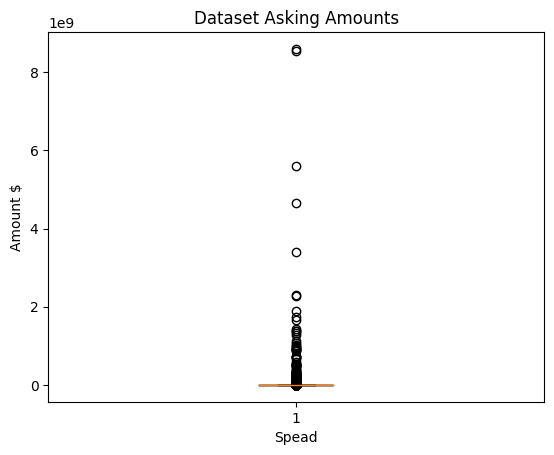

In [79]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Dataset Asking Amounts')
ax1.set_ylabel('Amount $')
ax1.set_xlabel('Spead')
ax1.boxplot(dummy_working_op1_df['ASK_AMT'])
plt.show()

In [80]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(dummy_working_op1_df['ASK_AMT'],[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
print("Lower boundry: ", lower_bound, " | Upper boundry: ", upper_bound)

potential_outliers = [AMT for AMT in dummy_working_op1_df['ASK_AMT'] if AMT < lower_bound or AMT > upper_bound]
print("Samples in dataset prior to outlier removal: " + str(len(dummy_working_op1_df['ASK_AMT'])))
print("After outlier removal: " + str(len(dummy_working_op1_df['ASK_AMT']) - len(potential_outliers)))

Lower boundry:  887.0  | Upper boundry:  11855.0
Samples in dataset prior to outlier removal: 34299
After outlier removal: 26093


In [83]:
# Drop the unnecessary rows from the dataset
condensed_data = dummy_working_op1_df[~dummy_working_op1_df['ASK_AMT'].isin(potential_outliers)]
print("Step 4 of 6 - Remove rows where 'ASK_AMT' is an outlier... Samples: ", len(condensed_data), " | Columns/Features: ", len(condensed_data.columns))

Step 4 of 6 - Remove rows where 'ASK_AMT' is an outlier... Samples:  26093  | Columns/Features:  72


In [84]:
X1 = condensed_data.drop('IS_SUCCESSFUL', axis=1)
y1 = condensed_data['IS_SUCCESSFUL']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=1)

print("Step 5 of 6 - Split training and testing samples... Samples: ", len(X_train1), " | Columns/Features: ", len(X_train1.columns))

Step 5 of 6 - Split training and testing samples... Samples:  19569  | Columns/Features:  71


In [85]:
# Create a Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust the alpha parameter for regularization strength
lasso_model.fit(X_train1, y_train1)

lasso_predictions = lasso_model.predict(X_test1)
lasso_rmse = mean_squared_error(y_test1, lasso_predictions, squared=False)
print("Lasso RMSE:", lasso_rmse)

# Create a Ridge model
ridge_model = Ridge(alpha=0.1)  # Adjust the alpha parameter for regularization strength
ridge_model.fit(X_train1, y_train1)

ridge_predictions = ridge_model.predict(X_test1)
ridge_rmse = mean_squared_error(y_test1, ridge_predictions, squared=False)
print("Ridge RMSE:", ridge_rmse)

print("- - -")

lasso_coeffs = lasso_model.coef_
ridge_coeffs = ridge_model.coef_

# make an array of columns to drop after failing Lasso and Ridge tests
drop_columns = []

Lower_Ridge = -0.005
Upper_Ridge = 0.005

for i in range(len(lasso_coeffs)):
    if lasso_coeffs[i] == 0 and ((ridge_coeffs[i] > Lower_Ridge and ridge_coeffs[i] <= 0) or (ridge_coeffs[i] < Upper_Ridge and ridge_coeffs[i] >= 0)):
        drop_columns.append(i)

print(drop_columns)
print("# of Columns/Features that will be dropped", len(drop_columns))

# remove columns from X1 df
X_train1 = X_train1.drop(X_train1.columns[drop_columns], axis=1)
X_test1 = X_test1.drop(X_test1.columns[drop_columns], axis=1)

print("Step 6 of 6 - Remove Columns that fail Lasso & Ridge Tests... Samples: ", len(X_train1), " | Columns/Features: ", len(X_train1.columns))

Lasso RMSE: 0.49697971875244473
Ridge RMSE: 0.4343868204024987
- - -
[2, 67]
# of Columns/Features that will be dropped 2
Step 6 of 6 - Remove Columns that fail Lasso & Ridge Tests... Samples:  19569  | Columns/Features:  69


In [25]:
X_scaler1 = scaler.fit(X_train1)

X_train_scaled1 = X_scaler1.transform(X_train1)
X_test_scaled1 = X_scaler1.transform(X_test1)

# Define the model
nn_op1 = tf.keras.models.Sequential()

# First hidden layer
nn_op1.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_scaled1.shape[1]))

# Second hidden layer
nn_op1.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_op1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_op1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                5600      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,061
Trainable params: 8,061
Non-trainable params: 0
_________________________________________________________________


In [26]:
nn_op1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = nn_op1.fit(X_train_scaled1, y_train1, epochs=10, verbose=1, batch_size=16)

Epoch 1/10
1224/1224 [==============================] - 3s 2ms/step - loss: 0.5521 - accuracy: 0.7380
Epoch 2/10
1224/1224 [==============================] - 2s 2ms/step - loss: 0.5320 - accuracy: 0.7478
Epoch 3/10
1224/1224 [==============================] - 3s 3ms/step - loss: 0.5292 - accuracy: 0.7497
Epoch 4/10
1224/1224 [==============================] - 2s 2ms/step - loss: 0.5259 - accuracy: 0.7490
Epoch 5/10
1224/1224 [==============================] - 2s 2ms/step - loss: 0.5248 - accuracy: 0.7510
Epoch 6/10
1224/1224 [==============================] - 2s 2ms/step - loss: 0.5243 - accuracy: 0.7507
Epoch 7/10
1224/1224 [==============================] - 2s 2ms/step - loss: 0.5224 - accuracy: 0.7530
Epoch 8/10
1224/1224 [==============================] - 3s 2ms/step - loss: 0.5221 - accuracy: 0.7533
Epoch 9/10
1224/1224 [==============================] - 2s 2ms/step - loss: 0.5211 - accuracy: 0.7529
Epoch 10/10
1224/1224 [==============================] - 2s 2ms/step - loss: 0.520

In [27]:
model_loss, model_accuracy = nn_op1.evaluate(X_test_scaled1,y_test1,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7368
Loss: 0.5481538772583008, Accuracy: 0.7368178963661194


In [38]:
# Export our model to HDF5 file
nn_op1.save('AlphabetSoupCharity_Optimization_1.h5')

## Optimization Method 2 - Oversampling

In [99]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train1, y_train1)

In [100]:
X_resampled_df = pd.DataFrame(X_resampled)
X_train1_df = pd.DataFrame(X_train1)
print(X_train1_df.shape)
print(X_resampled_df.shape)

(19569, 69)
(20454, 69)


In [103]:
X_scaler2 = scaler.fit(X_resampled_df)

X_train_resampled2 = X_scaler2.transform(X_resampled_df)
X_test_scaled2 = X_scaler2.transform(X_test1)

X_train_resampled2.shape

(20454, 69)

In [102]:
# Define the model
nn_op3 = tf.keras.models.Sequential()

# First hidden layer
nn_op3.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_resampled2.shape[1]))

# Second hidden layer
nn_op3.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_op3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_op3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 80)                5600      
                                                                 
 dense_22 (Dense)            (None, 30)                2430      
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8,061
Trainable params: 8,061
Non-trainable params: 0
_________________________________________________________________


In [106]:
nn_op3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = nn_op3.fit(X_train_resampled2, y_resampled, epochs=10, verbose=1, batch_size=16)

Epoch 1/10
1279/1279 [==============================] - 4s 3ms/step - loss: 0.5213 - accuracy: 0.7537
Epoch 2/10
1279/1279 [==============================] - 3s 2ms/step - loss: 0.5207 - accuracy: 0.7534
Epoch 3/10
1279/1279 [==============================] - 3s 2ms/step - loss: 0.5189 - accuracy: 0.7534
Epoch 4/10
1279/1279 [==============================] - 3s 2ms/step - loss: 0.5187 - accuracy: 0.7540
Epoch 5/10
1279/1279 [==============================] - 3s 2ms/step - loss: 0.5186 - accuracy: 0.7539
Epoch 6/10
1279/1279 [==============================] - 4s 3ms/step - loss: 0.5178 - accuracy: 0.7539
Epoch 7/10
1279/1279 [==============================] - 3s 2ms/step - loss: 0.5181 - accuracy: 0.7556
Epoch 8/10
1279/1279 [==============================] - 3s 2ms/step - loss: 0.5175 - accuracy: 0.7555
Epoch 9/10
1279/1279 [==============================] - 2s 2ms/step - loss: 0.5167 - accuracy: 0.7551
Epoch 10/10
1279/1279 [==============================] - 3s 2ms/step - loss: 0.516

In [107]:
model_loss, model_accuracy = nn_op3.evaluate(X_test_scaled2,y_test1,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 3ms/step - loss: 0.5476 - accuracy: 0.7379
Loss: 0.5476242899894714, Accuracy: 0.7378908395767212


## Optimization Method 3 - Altering Model

In [28]:
# Model creation function for ease of coding later
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    activation = hp.Choice('activation', ['relu', 'leaky_relu']) # removed 'tanh', 'selu', 'elu', & 'sigmoid'

    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=10,
        max_value=1000,
        step=5), activation=activation, input_dim=X_train1.shape[1]))
    
    for i in range(hp.Int('num_layers', 4, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=10,
            max_value=1000,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [29]:
# Install & import the kerastuner library
!pip install keras_tuner
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.6 MB/s eta 0:00:00


In [30]:
tuner = kt.Hyperband(
    create_model,
    objective="accuracy",
    max_epochs=10,
    hyperband_iterations=2)

In [31]:
tuner.search(X_train_scaled1,y_train1,epochs=5,validation_data=(X_test_scaled1,y_test1), batch_size=16)

Trial 60 Complete [00h 06m 24s]
accuracy: 0.751545786857605

Best accuracy So Far: 0.7543563842773438
Total elapsed time: 02h 04m 51s


In [32]:
top_hyper = tuner.get_best_hyperparameters(5)

for param in top_hyper:
    for key, value in param.values.items():
        print(f"{key}: {value}")
    print("- - -")

activation: relu
first_units: 80
num_layers: 5
units_0: 1000
units_1: 55
units_2: 70
units_3: 45
units_4: 500
units_5: 75
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0042
- - -
activation: relu
first_units: 140
num_layers: 4
units_0: 795
units_1: 295
units_2: 905
units_3: 60
units_4: 430
units_5: 315
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
- - -
activation: relu
first_units: 320
num_layers: 5
units_0: 70
units_1: 520
units_2: 740
units_3: 590
units_4: 50
units_5: 930
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0045
- - -
activation: relu
first_units: 265
num_layers: 4
units_0: 270
units_1: 495
units_2: 75
units_3: 310
units_4: 370
units_5: 110
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
- - -
activation: relu
first_units: 470
num_layers: 4
units_0: 430
units_1: 60
units_2: 200
units_3: 875
units_4: 100
units_5: 610
tune

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_op2 = tf.keras.models.Sequential()

# Take optimized hyperparams and make a model
nn_op2.add(tf.keras.layers.Dense(units=top_hyper[0].values.get('first_units'), activation=top_hyper[0].values.get('activation'), input_dim=X_train_scaled1.shape[1]))
for i in range(top_hyper[0].values.get('num_layers')):
    nn_op2.add(tf.keras.layers.Dense(units=top_hyper[0].values.get(f'units_{i}'), activation=top_hyper[0].values.get('activation')))

# Output layer
nn_op2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_op2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 80)                5600      
                                                                 
 dense_15 (Dense)            (None, 1000)              81000     
                                                                 
 dense_16 (Dense)            (None, 55)                55055     
                                                                 
 dense_17 (Dense)            (None, 70)                3920      
                                                                 
 dense_18 (Dense)            (None, 45)                3195      
                                                                 
 dense_19 (Dense)            (None, 500)               23000     
                                                                 
 dense_20 (Dense)            (None, 1)                

In [40]:
# Compile the model
nn_op2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Train the model
history = nn_op2.fit(X_train_scaled1, y_train1, epochs=100, verbose=1, batch_size=16)

Epoch 1/100
1224/1224 [==============================] - 10s 8ms/step - loss: 0.5363 - accuracy: 0.7461
Epoch 2/100
1224/1224 [==============================] - 7s 6ms/step - loss: 0.5303 - accuracy: 0.7498
Epoch 3/100
1224/1224 [==============================] - 7s 6ms/step - loss: 0.5290 - accuracy: 0.7475
Epoch 4/100
1224/1224 [==============================] - 6s 5ms/step - loss: 0.5258 - accuracy: 0.7489
Epoch 5/100
1224/1224 [==============================] - 8s 6ms/step - loss: 0.5267 - accuracy: 0.7507
Epoch 6/100
1224/1224 [==============================] - 6s 5ms/step - loss: 0.5237 - accuracy: 0.7536
Epoch 7/100
1224/1224 [==============================] - 8s 6ms/step - loss: 0.5233 - accuracy: 0.7519
Epoch 8/100
1224/1224 [==============================] - 6s 5ms/step - loss: 0.5228 - accuracy: 0.7515
Epoch 9/100
1224/1224 [==============================] - 8s 6ms/step - loss: 0.5216 - accuracy: 0.7517
Epoch 10/100
1224/1224 [==============================] - 6s 5ms/step - 

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_op2.evaluate(X_test_scaled1,y_test1,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 2ms/step - loss: 0.6784 - accuracy: 0.7362
Loss: 0.6784164309501648, Accuracy: 0.7362048029899597


In [44]:
# Export our model to HDF5 file
nn_op2.save('AlphabetSoupCharity_Optimization_2.h5')